# Content
## 1. Importing Libraries
## 2. Importing Data Frame
## 3.Security Implication
## 4. Create a Region flag
## 5. Create exclusion flag for low-activity customers
## 6. Create customer Profiles
## 7. Visualizing profiles
## 8. Customer profile level statistics
## 9. Compare customer profiles with regions and departments
## 10. Visualizing profiles by departments

# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing Data Frame

In [3]:
# Creating the path for the data
path = r'C:\Users\sdaon\Documents\Instacart Basket Analysis'

In [4]:
# Importing orders_products_customer_merged
df_ords_prods_custm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_combined.pkl'))

# 3. Security Implication

In [5]:
df_ords_prods_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_median,frequent_flag,gender,state,age,date_joined,numbers_of_dependants,family_status,income,True
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
df_ords_prods_custm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  Busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spendi

 ##  4. Create a Region flag

In [7]:
#Checking to see the state names in our dataframe
df_ords_prods_custm['state'].value_counts(dropna = False)

Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
New York                636697
Nevada                  636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mississi

In [17]:
# Creating list of regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut','New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [18]:
# Create a list from state column
states = df_ords_prods_custm['state'].tolist()

In [19]:
# Assign region flag to list
region_flags = []
for row in df_ords_prods_custm['state']:
    if row in northeast:
        region_flags.append('Northeast')
    elif row in midwest:
        region_flags.append('Midwest')
    elif row in south:
        region_flags.append('South')
    elif row in west:
        region_flags.append('West')
    else:
        print(row + ' Cannot recognize state')      

In [20]:
# create a new region column from region_flags list
df_ords_prods_custm['region'] = region_flags

In [12]:
df_ords_prods_custm['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [13]:
regional_spending_crosstab = pd.crosstab(df_ords_prods_custm['region'], df_ords_prods_custm['spending_loc'], dropna = False)

In [14]:
regional_spending_crosstab.head()

spending_loc,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


## 5. Create exclusion flag for low-activity customers

In [15]:

df_ords_prods_custm.loc[df_ords_prods_custm['max_order'] < 5, 'activity_flag'] = 'Low-activity customers'

In [16]:

df_ords_prods_custm.loc[df_ords_prods_custm['max_order'] >= 5, 'activity_flag'] = 'High-activity customers'

In [17]:

df_ords_prods_custm['activity_flag'].value_counts(dropna = False)

High-activity customers    30992664
Low-activity customers      1441548
Name: activity_flag, dtype: int64

In [18]:
df_low_order_customers = df_ords_prods_custm[df_ords_prods_custm['activity_flag'] == 'Low order customer']

In [19]:
df_low_order_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,numbers_of_dependants,family_status,income,True,region,activity_flag


In [20]:
#Exporting data
df_low_order_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_order_customer.pkl'))

## 6. Create customer Profiles

In [21]:
df_ords_prods_custm.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,numbers_of_dependants,family_status,income,True,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customers
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customers
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customers
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customers
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3317979,15,5,4,15,17.0,14715,1,1,Coconut Water,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,both,Midwest,High-activity customers
96,2685110,15,7,1,11,17.0,14715,3,1,Coconut Water,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,both,Midwest,High-activity customers
97,887727,15,9,2,13,7.0,14715,1,1,Coconut Water,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,both,Midwest,High-activity customers
98,2600170,15,11,2,9,14.0,14715,1,1,Coconut Water,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,both,Midwest,High-activity customers


I can create flags related to age, income, and "numbers_of_dependants" numbers_of_dependants
- Young (<=25), Middle-Aged(26-59), Senior (60+)
- Low-income, Mid-income, High-income
- Singe Parent, Partnered, No Child

In [30]:
# single
df_ords_prods_custm.loc[(df_ords_prods_custm['numbers_of_dependants'] >= 1) & (df_ords_prods_custm['income'] < 50000), 'dep_profile'] = 'Single'

# partnered
df_ords_prods_custm.loc[(df_ords_prods_custm['numbers_of_dependants'] >= 1) & (df_ords_prods_custm['income'] >= 50000), 'dep_profile'] = 'Partnered'

# No Child
df_ords_prods_custm.loc[(df_ords_prods_custm['numbers_of_dependants'] < 1), 'dep_profile'] = 'No-Child'

# Middle-Aged
df_ords_prods_custm.loc[(df_ords_prods_custm['age'] > 25) & df_ords_prods_custm['age'] <= 59, 'age_profile'] = 'Middle-Aged'

# Senior
df_ords_prods_custm.loc[(df_ords_prods_custm['age'] >= 60), 'age_profile'] = 'Senior'

# Young
df_ords_prods_custm.loc[(df_ords_prods_custm['age'] <= 25), 'age_profile'] = 'Young'

# Mid-income
df_ords_prods_custm.loc[(df_ords_prods_custm['income'] >= 40000) & df_ords_prods_custm['income'] < 100000, 'income_profile'] = 'Mid-income'

# High-income
df_ords_prods_custm.loc[(df_ords_prods_custm['income'] >= 100000), 'income_profile'] = 'High-income'

# Low-income
df_ords_prods_custm.loc[(df_ords_prods_custm['income'] < 40000), 'income_profile'] = 'Low-income'


In [23]:
df_ords_prods_custm['dep_profile'].value_counts(dropna = False)

Partnered    21636033
No-Child      8105197
Single        2692982
Name: dep_profile, dtype: int64

In [13]:
df_ords_prods_custm['age_profile'].value_counts(dropna = False)

Middle-Aged    17308053
Senior         11077150
Young           4049009
Name: age_profile, dtype: int64

In [31]:
df_ords_prods_custm['income_profile'].value_counts(dropna = False)

Mid-income     15877883
High-income    14827337
Low-income      1728992
Name: income_profile, dtype: int64

# 7. Visualizing profiles

In [33]:
df_profiles = df_ords_prods_custm[['user_id',"region", 'age_profile', 'income_profile', 'dep_profile']]
df_customer_profiles = df_profiles.groupby('user_id').first()

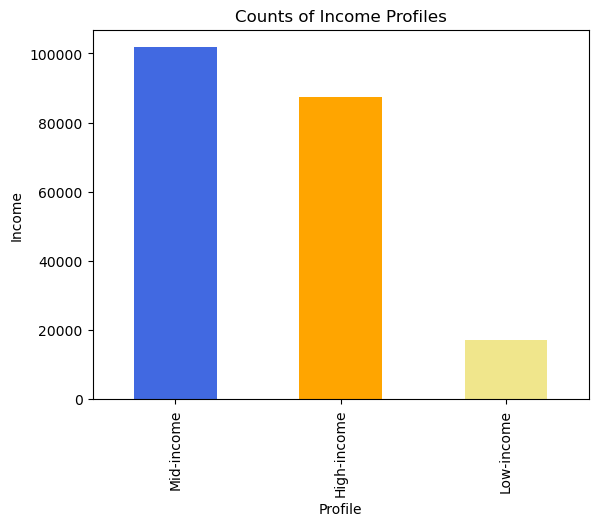

In [35]:
plt = df_customer_profiles['income_profile'].value_counts().plot.bar(color = ['royalblue', 'orange', 'khaki'], 
                                                                     title="Income Profiles",
                                                                     xlabel="Profile",
                                                                     ylabel="Income"
                                                                    )
plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_distribution.png'))

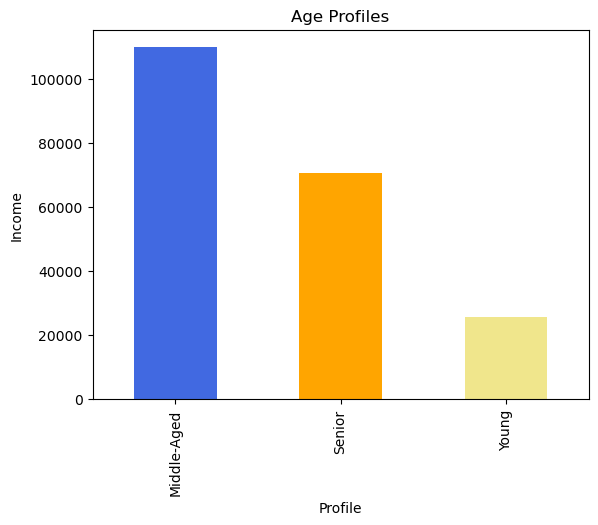

In [26]:
plt = df_customer_profiles['age_profile'].value_counts().plot.bar(color = ['royalblue', 'orange', 'khaki'], 
                                                                  title = "Age Profiles",
                                                                  xlabel="Profile",
                                                                  ylabel="Income")
plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_profile_distribution.png'))

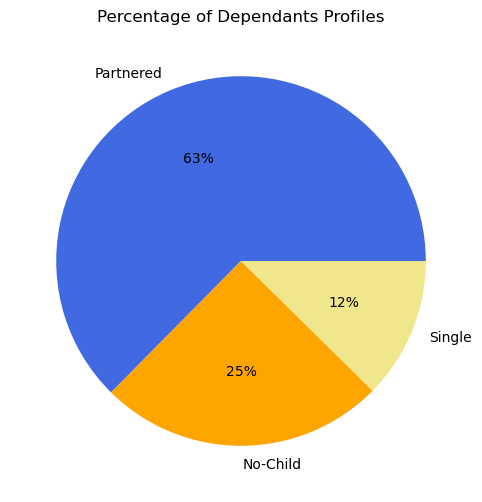

In [36]:
pie_chart = df_customer_profiles['dep_profile'].value_counts().plot.pie(figsize = (8,6), 
                                                                        colors = sns.color_palette( ['royalblue', 'orange', 'khaki']), 
                                                                        autopct = '%1.0f%%', 
                                                                        title ="Percentage of Dependants Profiles",
                                                                        xlabel="",
                                                                        ylabel="",)
pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_profile_pie.png'))

# 8. Customer profile level statistics

In [30]:
# Age profile
df_ords_prods_custm.groupby('age_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices               days_since_prior_order           
                  mean      max  min                   mean   max  min
age_profile                                                           
Middle-Aged  12.093500  99999.0  1.0              11.110020  30.0  0.0
Senior       11.764519  99999.0  1.0              11.092861  30.0  0.0

In [31]:
# Income profile
df_ords_prods_custm.groupby('income_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices               days_since_prior_order           
                    mean      max  min                   mean   max  min
income_profile                                                          
High-income     16.57655  99999.0  1.0              11.040148  30.0  0.0
Mid-income       8.11120  99999.0  1.0              11.158202  30.0  0.0

In [32]:
# Dependent profile
df_ords_prods_custm.groupby('dep_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices               days_since_prior_order           
                  mean      max  min                   mean   max  min
dep_profile                                                           
No-Child     12.130045  99999.0  1.0              11.080606  30.0  0.0
Partnered    12.582620  99999.0  1.0              11.050365  30.0  0.0
Single        6.700590     25.0  1.0              11.612723  30.0  0.0

# 9. Compare customer profiles with regions and departments

In [40]:
# Regional age differences
age_crosstab_region = pd.crosstab(df_customer_profiles['region'], df_customer_profiles['age_profile'], dropna = False)

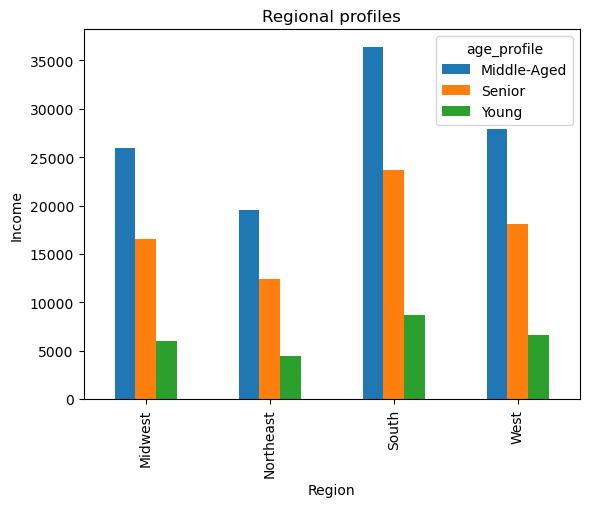

In [41]:
plt = age_crosstab_region.plot(kind = 'bar', 
                               stacked = False, 
                               title = 'Regional profiles',
                               xlabel="Region",
                               ylabel="Income")
plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_crosstab_region_bar.png'))

In [37]:
# Regional income differences
income_crosstab_region = pd.crosstab(df_customer_profiles['region'], df_customer_profiles['income_profile'], dropna = False)

In [38]:
income_crosstab_region = pd.crosstab(df_customer_profiles['region'], df_customer_profiles['income_profile'], dropna = False)

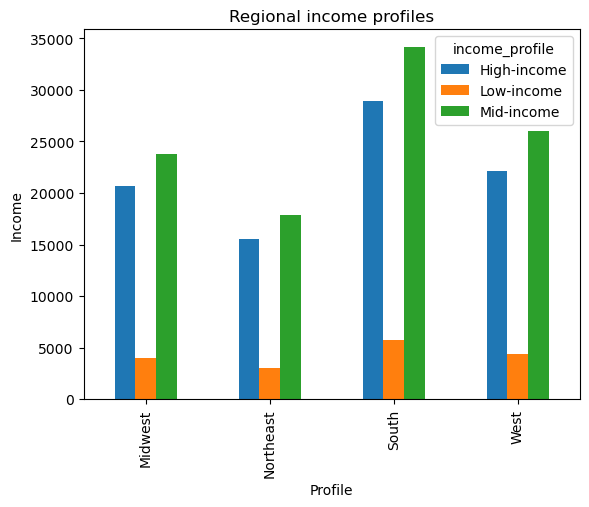

In [39]:
plt = income_crosstab_region.plot(kind = 'bar', 
                                  stacked = False, 
                                  title = 'Regional income profiles',
                                  xlabel="Profile",
                                  ylabel="Income")
plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_crosstab_region_bar.png'))

In [42]:
# Regional dependent differences
df_midwest = df_customer_profiles.loc[df_customer_profiles['region'] == "Midwest"]
df_northeast = df_customer_profiles.loc[df_customer_profiles['region'] == "Northeast"]
df_south = df_customer_profiles.loc[df_customer_profiles['region'] == "South"]
df_west = df_customer_profiles.loc[df_customer_profiles['region'] == "West"]

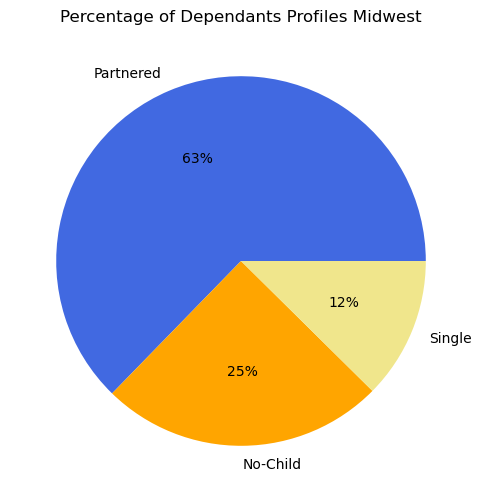

In [55]:
pie_chart1 = df_midwest['dep_profile'].value_counts().plot.pie(figsize = (8,6), 
                                                                        colors = sns.color_palette( ['royalblue', 'orange', 'khaki']), 
                                                                        autopct = '%1.0f%%', 
                                                                        title ="Percentage of Dependants Profiles Midwest",
                                                                        xlabel="",
                                                                        ylabel="",)
pie_chart1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_crosstab_midwest_pie.png'))

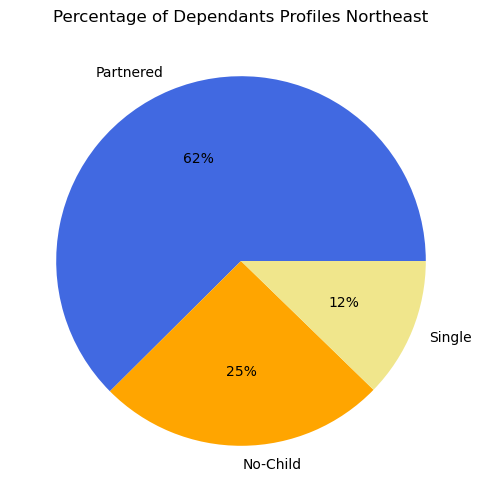

In [44]:
pie_chart2 = df_northeast['dep_profile'].value_counts().plot.pie(figsize = (8,6), 
                                                                        colors = sns.color_palette( ['royalblue', 'orange', 'khaki']), 
                                                                        autopct = '%1.0f%%', 
                                                                        title ="Percentage of Dependants Profiles Northeast",
                                                                        xlabel="",
                                                                        ylabel="",)
pie_chart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_crosstab_nordeast_pie.png'))

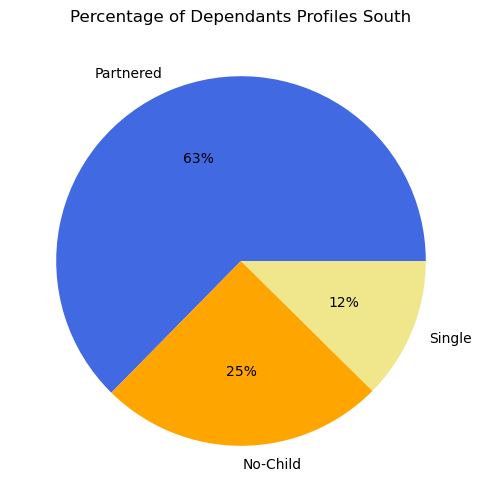

In [45]:
pie_chart3 = df_south['dep_profile'].value_counts().plot.pie(figsize = (8,6), 
                                                                        colors = sns.color_palette( ['royalblue', 'orange', 'khaki']), 
                                                                        autopct = '%1.0f%%', 
                                                                        title ="Percentage of Dependants Profiles South",
                                                                        xlabel="",
                                                                        ylabel="",)
pie_chart3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_crosstab_south_pie.png'))

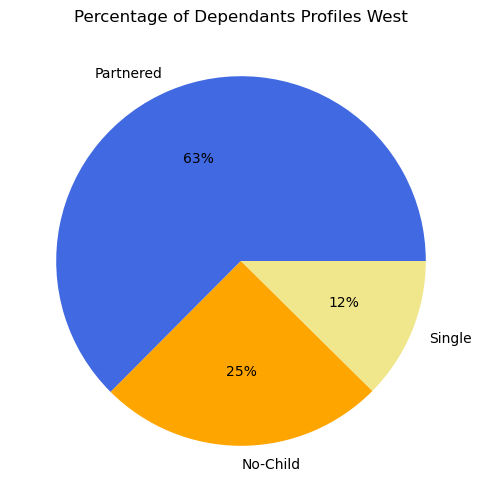

In [46]:
pie_chart4 = df_west['dep_profile'].value_counts().plot.pie(figsize = (8,6), 
                                                                        colors = sns.color_palette( ['royalblue', 'orange', 'khaki']), 
                                                                        autopct = '%1.0f%%', 
                                                                        title ="Percentage of Dependants Profiles West",
                                                                        xlabel="",
                                                                        ylabel="",)
pie_chart4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_crosstab_west_pie.png'))

# 10.  Visualizing profiles by departments

In [41]:
df_ords_prods_custm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 37 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  Busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spendi

In [28]:
# creating subset of profiles nd departments
df_virtual = df_ords_prods_custm[['department_id', 'user_id',  'region','age_profile', 'income_profile', 'loyalty_flag', 'spending_loc', 'frequent_flag', 'family_status']]

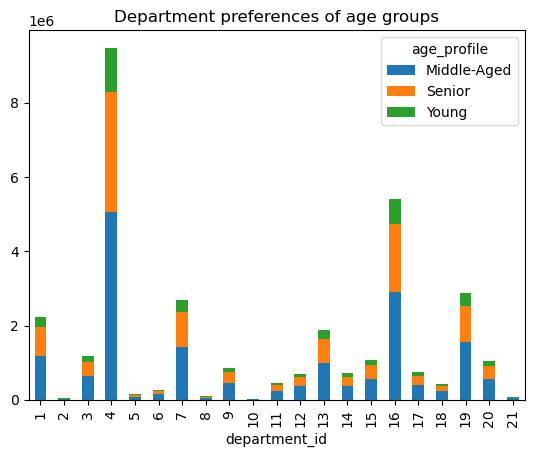

In [29]:
depts_age_crosstab = pd.crosstab(df_virtual['department_id'], df_virtual['age_profile'], dropna = False)
plt = depts_age_crosstab.plot(kind = 'bar', stacked = True, title = 'Department preferences of age groups',)
plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_pref_age_bar.png'))